In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import datetime
from os import listdir
#from os.path import isfile, join
import glob

%matplotlib inline

This notebook should: 
(a) download the latest CTT files
(b) read downloaded CTT files
(c) stick them into a pandas file

In order to:
(a) plot node locations
(b) extract individual beeps and thereby localise
(c) and whatever else

1. Set up a file to hold all the id and file location stuff
2. Make a function to get all new data files
3. Get a list of tags detected, let somebody list tags of interest
4. Get the localisation by signal strength working
5. Comments!!

In [2]:
#df = pd.read_csv("/home/marslast/Documents/CTT-6B9A01B19306-node-health.2023-05-26_043307.csv.gz")

In [194]:
gps.head()

,Time,RadioId,NodeId,NodeRSSI,Battery,Celsius,RecordedAt,Firmware,SolarVolts,SolarCurrent,CumulativeSolarCurrent,Latitude,Longitude
0,2023-06-12 21:51:17,1,378567,-88,3.51,1,2023-06-12 21:50:58,1.17.5,5.08,8,94501236,-41.250712,175.241600
1,2023-06-12 21:51:31,1,375fb3,-57,3.98,10,2023-06-12 21:51:30,1.17.5,6.25,34,105584436,-41.250080,175.240528
2,2023-06-12 21:51:34,1,37506e,-80,4.04,10,2023-06-12 21:51:33,1.17.5,6.25,24,101199181,-41.250832,175.242064
3,2023-06-12 21:51:44,1,379c29,-96,3.52,6,2023-06-12 21:48:47,1.16.5,5.11,10,31210956,-41.249052,175.241248
4,2023-06-12 21:51:45,1,378f60,-97,4.04,9,2023-06-12 21:51:44,1.17.5,5.67,21,72772798,-41.251056,175.242784


In [2]:
#files = glob.glob('/home/marslast/Documents/CTT/RatData/Rat responses to landscape barriers and corridors/6B9A01B19306/node_health/CTT-6B9A01B19306-node-health.*.csv.gz')
# Find the dates of all files available
files = glob.glob('/home/marslast/Downloads/CTT/CTT-6B9A01B19306-node-health.*.csv.gz')
dates = []
for f in files:
    if datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date() not in dates:
        dates.append(datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date())

#latest = max(dates)
print(min(dates), max(dates))

2023-05-12 2023-06-18


In [189]:
# Remember these times are UTC
#startdate = datetime.datetime.strptime("2023-05-01","%Y-%m-%d").date()
#enddate = datetime.datetime.strptime("2023-06-20","%Y-%m-%d").date()
startdate = max(dates)
enddate = datetime.date.today()
#print(startdate>enddate)

In [2]:
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#files = glob.glob('/home/marslast/Documents/CTT-6B9A01B19306-node-health.*.csv.gz')
#files = glob.glob('/home/marslast/Documents/CTT/RatData/Rat responses to landscape barriers and corridors/6B9A01B19306/node_health/CTT-6B9A01B19306-node-health.*.csv.gz')
files = glob.glob('/home/marslast/Downloads/CTT/CTT-6B9A01B19306-node-health.*.csv.gz')
keepfiles = []
for f in files:
    if datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date() >= startdate and datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date() <= enddate:
        keepfiles.append(f)

# CAREFUL!!! I'm suppressing the first file, since it has extra crap in it from previous dates. Not normal...
gps = pd.read_csv(keepfiles[1])
for f in keepfiles[2:]:
    df = pd.read_csv(f)
    gps = pd.concat([gps, df], ignore_index=True)

# Should add in the sensor station

In [192]:
#files = glob.glob('/home/marslast/Documents/CTT/RatData/Rat responses to landscape barriers and corridors/6B9A01B19306/raw/CTT-6B9A01B19306-raw-data.*.csv.gz')
files = glob.glob('/home/marslast/Downloads/CTT/CTT-6B9A01B19306-raw-data.*.csv.gz')
keepfiles = []
for f in files:
    if datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date() >= startdate and datetime.datetime.strptime(f[-24:-14], "%Y-%m-%d").date() <= enddate:
        keepfiles.append(f)

# CAREFUL!!! I'm suppressing the first file, since it has extra crap in it from previous dates. Not normal...
checkins = pd.read_csv(keepfiles[1])
for f in keepfiles[2:]:
    df = pd.read_csv(f)
    checkins = pd.concat([checkins, df], ignore_index=True)
    
beeps = checkins.dropna(subset=['TagId'])

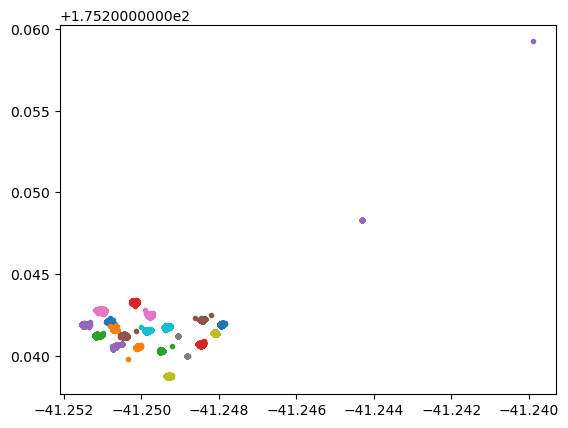

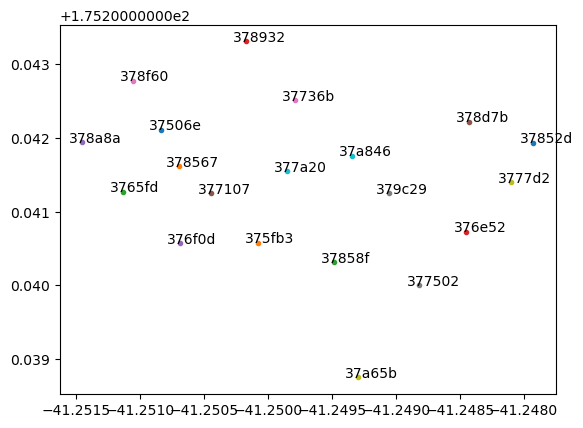

In [196]:
# Plot on map
# All data
nodes = np.unique(gps.NodeId)
for n in nodes:
    pl.plot(gps[gps.NodeId==n].Latitude.to_numpy(),gps[gps.NodeId==n].Longitude.to_numpy(),'.')

# Plot single point at average (remove outliers?)
# Give name
# Get the average, don't check for outliers
a = gps[['NodeId','Latitude','Longitude']]
avg_locns = a.groupby(['NodeId']).mean().reset_index()

#avg_locns = gps.groupby(by=['NodeId']).mean().reset_index()
avg_locns.head()
nodes = np.unique(avg_locns.NodeId)
pl.figure()
# WTF
#for n in nodes:
#    pl.plot(avg_locns[avg_locns.NodeId==n].Latitude,avg_locns[avg_locns.NodeId==n].Longitude,'.')
#    pl.text(avg_locns[avg_locns.NodeId==n].Latitude-0.0001,avg_locns[avg_locns.NodeId==n].Longitude,n)
for n in range(len(avg_locns)):
    pl.plot(avg_locns.iloc[n,1],avg_locns.iloc[n,2],'.')
    #print(avg_locns.iloc[n,1],avg_locns.iloc[n,2])
    pl.text(avg_locns.iloc[n,1]-0.0001,avg_locns.iloc[n,2],avg_locns.iloc[n,0])

# Compare with GPS

/usr/lib/python3/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


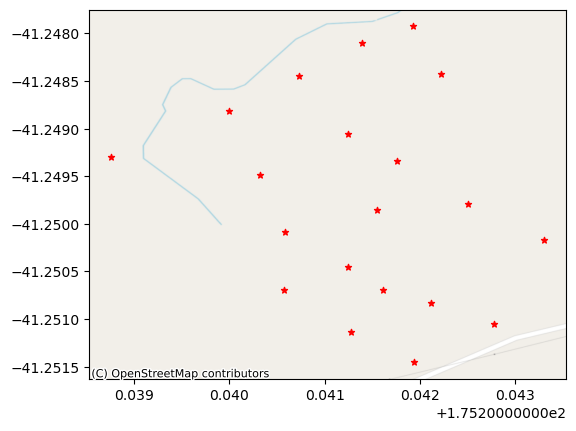

In [214]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(avg_locns.Longitude,avg_locns.Latitude)]
    
#ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

ax = pl.figure().gca()

#for x,y,label in zip(avg_locns.Longitude,avg_locns.Latitude,avg_locns.NodeId):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    
# plot the polygon
#ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
#ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# How to add labels? annotate line fails

In [91]:
# Remove the lines that aren't beeps
print(np.shape(checkins))
beeps = checkins.dropna(subset=['TagId'])
print(np.shape(beeps))

# There are a surprising number of spurious tags read
# Need to speed this up
tags = np.unique(beeps.TagId)
for i in tags:
    #print(len(np.where(beeps.TagId==i)[0]))
    if len(np.where(beeps.TagId==i)[0]) < 4:
        beeps = beeps[beeps.TagId!=i]

# TODO: Many of the tags look like error-ridden versions of true tags -- merge?
# Hamming distance from true tag?

#tags = np.unique(beeps.TagId)
#for i in tags:
#    print(i,len(np.where(beeps.TagId==i)[0]))

beeps.head()

# Could also just use a list of tags
print(np.unique(beeps.TagId))


(432780, 6)
(432780, 6)
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [216]:
#checkins['Time'].unique()
#checkins['Time']
#checkins.head()
#beeps = checkins.dropna(subset=['TagId'])
#checkins.head()
#tags = np.unique(checkins.TagId)
#print(len(tags))
beeps = checkins.dropna(subset=['TagId'])

tags = np.unique(beeps.TagId)
for i in tags:
    if len(np.where(beeps.TagId==i)[0]) > 100:
        print(i,len(np.where(beeps.TagId==i)[0]))

2A194B78 53681
2D2D6166 12672
332D7855 271492
332D78D5 584
332DF855 975
33AD7855 597
3466612D 58745
346661AD 171
3466E12D 155
34E6612D 157
4C664C66 15286
B32D7855 573
B466612D 163


In [19]:
# The tags that are out are:
#2A194B78
#332D7855
#19523434

#Stephen H on 1/6/23
# 2D2D6166

#Testing
#66556134 - pt 200729
#3466612D - pt 200729 
#2D074B78 - pt 200729

n = pd.DataFrame(beeps[beeps.TagId=='332D7855'])
n.sort_values(by='Time',axis=0,ascending=True,inplace=True)
#print(n.shape)
#n.tail()
print(len(np.unique(n.Time)))

96132


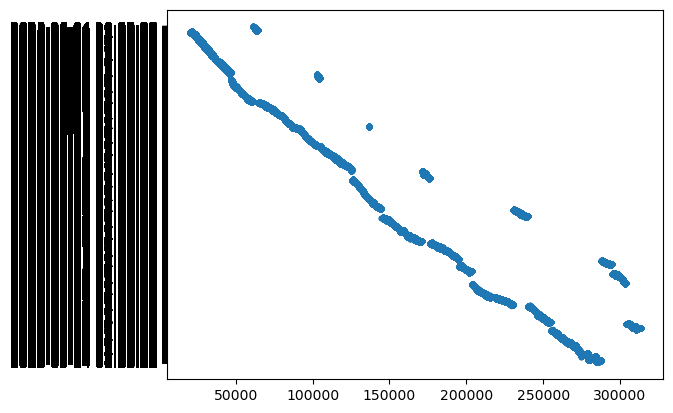

In [21]:
#n['Time']
pl.plot(n.Time,'.')

In [219]:
beeps.Time

0         2023-06-03 04:34:07
1         2023-06-03 04:34:21
2         2023-06-03 04:34:36
3         2023-06-03 04:34:50
4         2023-06-03 04:35:05
                 ...         
432775    2023-06-10 23:39:40
432776    2023-06-10 23:44:05
432777    2023-06-10 23:47:24
432778    2023-06-10 23:47:47
432779    2023-06-10 23:49:42
Name: Time, Length: 432780, dtype: object

So now we have beeps detected. They can come in 3 ways:
1. Directly to the sensor station to the omnidirectional antenna
2. Directly to the sensor station to one of the yagis
3. From a node

The interesting one is 2, how to use the directional yagis, so let's ignore it for now.

In [31]:
# These nodes detected beeps
nodes = np.unique(beeps.NodeId.dropna())

#for n in nodes:
#    print(n,len(np.where(beeps.NodeId==n)[0]))

# Get the times of beeps that were detected by more than one node/SS
beeps['Time'].duplicated()
multiples = beeps.pivot_table(index=['Time'], aggfunc='size').reset_index()
multiples.rename(columns={0: 'Counts'},inplace=True)
times = multiples[multiples.Counts>1].Time

#multiples.sort_values(by='Counts',axis=0,ascending=False,inplace=True)
#multiples.head()
#beeps[beeps.Time=="2023-05-12 21:02:17"]

# Later on, should think about how to combine others in time

NameError: name 'avg_locns' is not defined

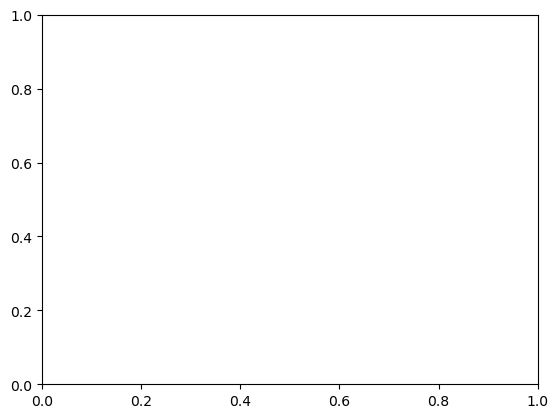

In [32]:
# For each beep (and tag!)
# We want to turn the RSSI into an approximate distance, and then use the location of the nodes to locate the beep
ax = pl.figure().gca()

for t in times[:10]:
    # This makes a little movie, or would not in a notebook
    ax.plot(avg_locns.Latitude,avg_locns.Longitude,'b.')
    df = beeps[beeps.Time==t][['NodeId','TagRSSI']]
    #NodeIds = beeps[beeps.Time==t].NodeId
    #RSSI = beeps[beeps.Time==t].TagRSSI
    #print(NodeIds,RSSI)
    #for n in NodeIds:
    #    ax.plot(avg_locns[avg_locns.NodeId==n].Latitude,avg_locns[avg_locns.NodeId==n].Longitude,'r.')

df = beeps[beeps.Time.isin(times)][['Time','NodeId','TagRSSI']]
df.tail()    
# Copy the calibration from the relevant paper
# Hence turn RSSI into distances

# Then localisation -- how many methods?


/tmp/ipykernel_527839/1132212892.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pl.plot(df.NodeId[-200:],df.TagRSSI[-200:],'.')


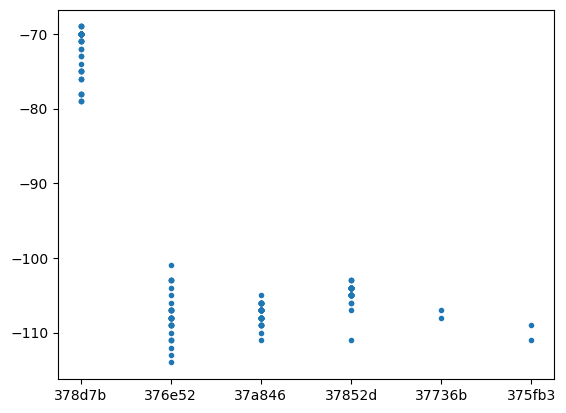

In [32]:
df.sort_values(by='Time',axis=0,ascending=False,inplace=True)
pl.plot(df.NodeId[-200:],df.TagRSSI[-200:],'.')

Calibration data from Stephen Hartley
20m	-67
18m	-65
16m	-62
15m	-60
10m	-54
1m	-33
0.05m	-19

In [3]:
# These are the ones I invented
#b = np.array([[30,-80],[40,-94],[60,-110],[70,-122]])
dists = np.array([
[70,-122],
[60,-110],
[40,-94],
[30,-80],
[20,-67],
[18,-65],
[16,-62],
[15,-60],
[10,-54],
[1,-33],
[0.05,-19],
])


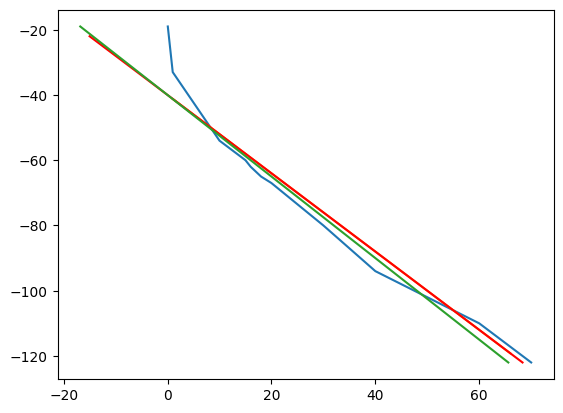

In [10]:
pl.plot(dists[:,0],dists[:,1])
x = np.arange(1,70,5)
pl.plot(x,-x*1.2-40)
y = np.arange(-122,-20,10)
pl.plot((-y-40)/1.2,y,'r')
pl.plot((-dists[:,1]-40)*0.8,dists[:,1]);

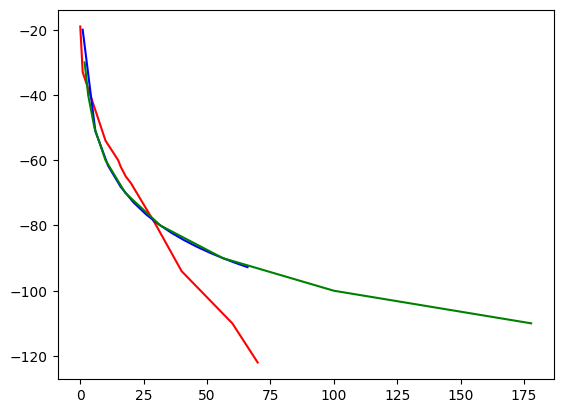

In [49]:
pl.plot(dists[:,0],dists[:,1],'r')
x = np.arange(1,70,5)
pl.plot(x,-20-10*4*np.log10(x),'b')
y = np.arange(-110,-20,10)
pl.plot(10**((-20-y)/(10*4)),y,'g')


In [ ]:
# Then directional yagis

/home/marslast/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


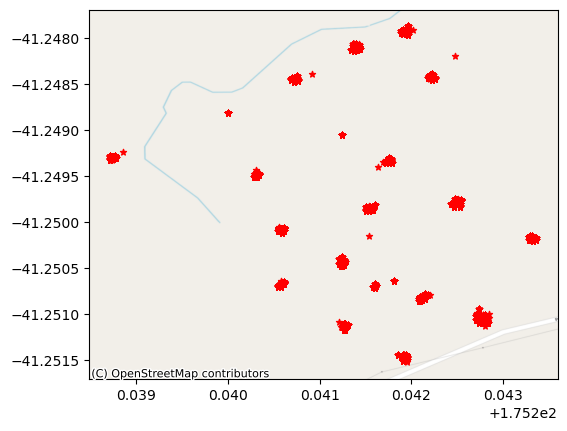

In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gps.Longitude,gps.Latitude)]


#wardlink = "New Folder/wards delimited.shp"

#ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

#ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

# plot the polygon
#ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
#ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = pl.figure().gca()
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [8]:
# Tags Ellen put out (24/4/23 -- 19/05/23)
#19523434
#3466612D
#66556134

# Rat tags:
# 2A194B78 19/5/23 1530
# 332D7855 24/5/23 1500
# 19523434 21/6/23 1530

NameError: name 'ax' is not defined

In [10]:
metadata={
    'host' : 'https://api.internetofwildlife.com' ,
    'projectdir' : '/station/api/projects',
    'stationdir' : '/station/api/stations',
    'filedir' : '/station/api/file-list',
    'getfiledir' : '/station/api/download-file',
    'token' : 'ec28800e77b3b2ce0993c51c2bf1a62b62e8ef1f369696a0a27ea98847f8b3c1',
    'projectid' : 200,
    'projectname' : 'Rat responses to landscape barriers and corridors',
    'stationid' : '6B9A01B19306',
    'file_types' : ["data", "node-data", "gps", "log", "telemetry", "sensorgnome"],
    'savepath' : '/home/marslast/Downloads/CTT/'
}


In [5]:
metadata['host']

'https://api.internetofwildlife.com'

In [7]:
import requests
projects = requests.post(metadata['host']+metadata['projectdir'],json={'token':metadata['token']})

In [24]:
def getFiles(metadata,date):

    if date is None:
        stations = requests.post(metadata['host']+metadata['stationdir'],json={'token':metadata['token'], 'project-id':metadata['projectid']})
        date = stations.json()['stations'][0]['deploy-at']

    files = requests.post(metadata['host']+metadata['filedir'],json={'token':metadata['token'], 'project-id':metadata['projectid'], 'station-id':metadata['stationid'],'file-types':metadata['file_types'],'begin':date})
    #files = requests.post(metadata['host']+metadata['filedir'],json={'token':metadata['token'], 'project-id':metadata['projectid'], 'station-id':stations.json()['stations'][0]['station']['id'],'file-types':metadata['file_types'],'begin':date})

    for j in metadata['file_types']:
        for i in range(len(files.json()['files'][j])):
            file_id = files.json()['files'][j][i]['id']
            download = requests.post(metadata['host']+metadata['getfiledir'],json={'token':metadata['token'], 'project-id':metadata['projectid'], 'station-id':metadata['stationid'],'file-id':file_id})
            with open(metadata['savepath']+j+'/'+files.json()['files'][j][i]['name'],mode='wb') as f:
                f.write(gzip.compress(download.text.encode()))
            f.close()


In [27]:
getFiles(metadata,"2023-06-17")

In [28]:
name = 'CTT-6B9A01B19306-node-health.2023-06-17_065319.csv.gz'

In [46]:
date = datetime.datetime.strptime(name[-24:-7],'%Y-%m-%d_%H%M%S')
print(date)

2023-06-17 06:53:19


In [42]:
x = date.strftime('%Y-%m-%dT%H:%M:%S.000Z')

'2023-06-17T06:53:19.000Z'

In [48]:
date+=datetime.timedelta(seconds=1)

In [49]:
date

datetime.datetime(2023, 6, 17, 6, 53, 20)